### Ejercicio 4

El siguiente conjunto de datos, presentado al Subcomité Antimonopolio del Senado, muestra las características comparativas de supervivencia durante un choque de automóviles de diferentes clases. Encuentre la recta por mínimos cuadrados que aproxima estos datos (la tabla muestra el porcentaje de vehículos que participaron en un accidente en los que la lesión más grave fue fatal o seria).

| Tipo | Peso promedio | Porcentaje de presentación |
|---|---|---|
| 1. Regular lujoso doméstico | 4800 lb | 3.1 |
| 2. Regular intermediario doméstico | 3700 lb | 4.0 |
| 3. Regular económico doméstico | 3400 lb | 5.2 |
| 4. Compacto doméstico | 2800 lb | 6.4 |
| 5. Compacto extranjero | 1900 lb | 9.6 |

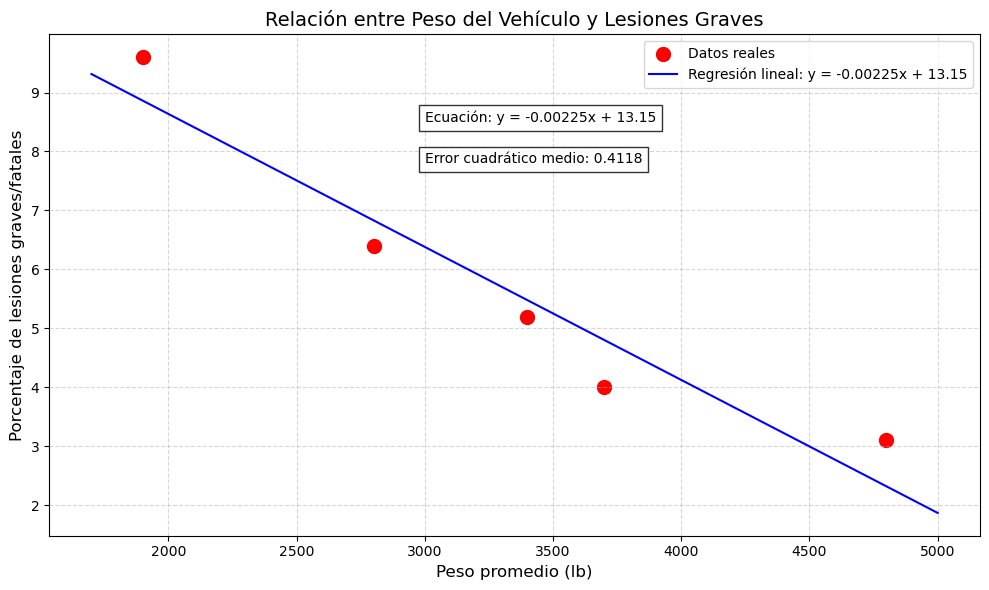


=== RESULTADOS DEL AJUSTE LINEAL ===
Ecuación de la recta: y = -0.00225x + 13.15
Interpretación: Por cada libra adicional de peso, disminuye en 0.00225% el riesgo de lesión grave
Intercepto: 13.15% (riesgo estimado para peso = 0 lb)
Error cuadrático medio: 0.4118

Predicción para vehículo de 4000 lb: 4.13% de lesiones graves


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Datos del ejercicio 4
pesos = np.array([4800, 3700, 3400, 2800, 1900])  # en libras
porcentajes = np.array([3.1, 4.0, 5.2, 6.4, 9.6])  # porcentaje de lesiones graves

# Ajuste por mínimos cuadrados (regresión lineal)
coeficientes = np.polyfit(pesos, porcentajes, 1)
pendiente = coeficientes[0]
intercepto = coeficientes[1]

# Crear función de la recta ajustada
recta_ajustada = np.poly1d(coeficientes)

# Calcular valores predichos
porcentajes_predichos = recta_ajustada(pesos)

# Calcular el error cuadrático medio
error = np.mean((porcentajes - porcentajes_predichos)**2)

# Crear gráfico
plt.figure(figsize=(10, 6))
plt.scatter(pesos, porcentajes, color='red', s=100, label='Datos reales')

# Graficar la recta de regresión
x_vals = np.linspace(min(pesos)-200, max(pesos)+200, 100)
plt.plot(x_vals, recta_ajustada(x_vals), 'b-', 
         label=f'Regresión lineal: y = {pendiente:.5f}x + {intercepto:.2f}')

# Configuración del gráfico
plt.title('Relación entre Peso del Vehículo y Lesiones Graves', fontsize=14)
plt.xlabel('Peso promedio (lb)', fontsize=12)
plt.ylabel('Porcentaje de lesiones graves/fatales', fontsize=12)
plt.legend(fontsize=10, loc='upper right')
plt.grid(True, linestyle='--', alpha=0.5)

# Añadir anotaciones con la ecuación y el error
plt.text(3000, 8.5, f'Ecuación: y = {pendiente:.5f}x + {intercepto:.2f}', 
         fontsize=10, bbox=dict(facecolor='white', alpha=0.8))
plt.text(3000, 7.8, f'Error cuadrático medio: {error:.4f}', 
         fontsize=10, bbox=dict(facecolor='white', alpha=0.8))

# Mostrar gráfico
plt.tight_layout()
plt.show()

# Resultados numéricos
print("\n=== RESULTADOS DEL AJUSTE LINEAL ===")
print(f"Ecuación de la recta: y = {pendiente:.5f}x + {intercepto:.2f}")
print(f"Interpretación: Por cada libra adicional de peso, disminuye en {abs(pendiente):.5f}% el riesgo de lesión grave")
print(f"Intercepto: {intercepto:.2f}% (riesgo estimado para peso = 0 lb)")
print(f"Error cuadrático medio: {error:.4f}")

# Predicción para un vehículo de 4000 lb
prediccion_4000 = recta_ajustada(4000)
print(f"\nPredicción para vehículo de 4000 lb: {prediccion_4000:.2f}% de lesiones graves")